In [8]:
# %% [code] {"_execution_state":"idle"}
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
# %% [code] {"_execution_state":"idle"}
drive.mount('/content/gdrive')
!ls /content/gdrive/My Drive/LINEARREG/Melbourne_housing_extra_data.csv
# %% [code] {"_execution_state":"idle"}
dataframe =  pd.read_csv("/content/gdrive/My Drive/LINEARREG/Melbourne_housing_extra_data.csv")


# %% [code] {"_execution_state":"idle"}
#dataframe_dr = dataframe_dr[dataframe_dr["Type"]=="h"]


# 

# %% [code] {"_execution_state":"idle"}

# %% [code] {"_execution_state":"idle"}
dataframe.dtypes #returns datatype of each column
# %% [code] {"_execution_state":"idle"}
dataframe.head() #returns the n rows
# %% [code] {"_execution_state":"idle"}
dataframe["Date"] = pd.to_datetime(dataframe["Date"],dayfirst=True)#converts argument to datetime format(pandas library) 
# %% [code] {"_execution_state":"idle"}
len(dataframe["Date"].unique())/4 #tells about the unique datetime stamps

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive/LINEARREG/Melbourne_housing_extra_data.csv': No such file or directory


13.0

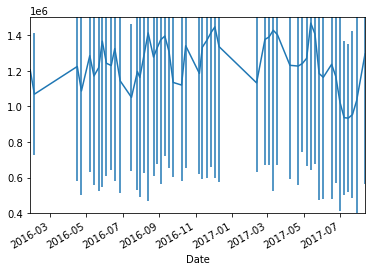

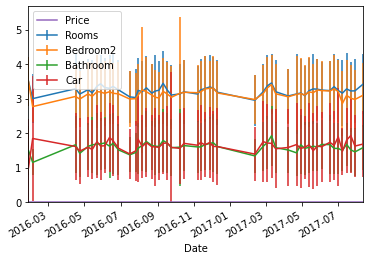

In [9]:

##12 Means a year of Data!
# %% [code] {"_execution_state":"idle"}
var = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std() #
count = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()
# %% [code] {"_execution_state":"idle"}
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))#plotting the mean price over
# %% [code] {"_execution_state":"idle"}
means = dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
errors = dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()
# %% [code] {"_execution_state":"idle"}
means.columns #returns the values for the requested axis
# %% [code] {"_execution_state":"idle"}
#fig, ax = plt.subplots()
means.drop(["Price",
            "Postcode",
       
          "Longtitude","Lattitude",
           "Distance","BuildingArea", "Propertycount","Landsize","YearBuilt"],axis=1).plot(yerr=errors)

# %% [code] {"_execution_state":"idle"}
dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

# %% [code] {"_execution_state":"idle"}
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
dataframe[(dataframe["Type"]=="h") & 
          (dataframe["Distance"]<14) &
          (dataframe["Distance"]>13.7) 
          #&(dataframe["Suburb"] =="Northcote")
         ].sort_values("Date", ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

# %% [code] {"_execution_state":"idle"}
sns.kdeplot(dataframe[(dataframe["Suburb"]=="Northcote") #fits an unvariate kernel density estimate 
         & (dataframe["Type"]=="u")
         & (dataframe["Rooms"] == 2)]["Price"])



/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


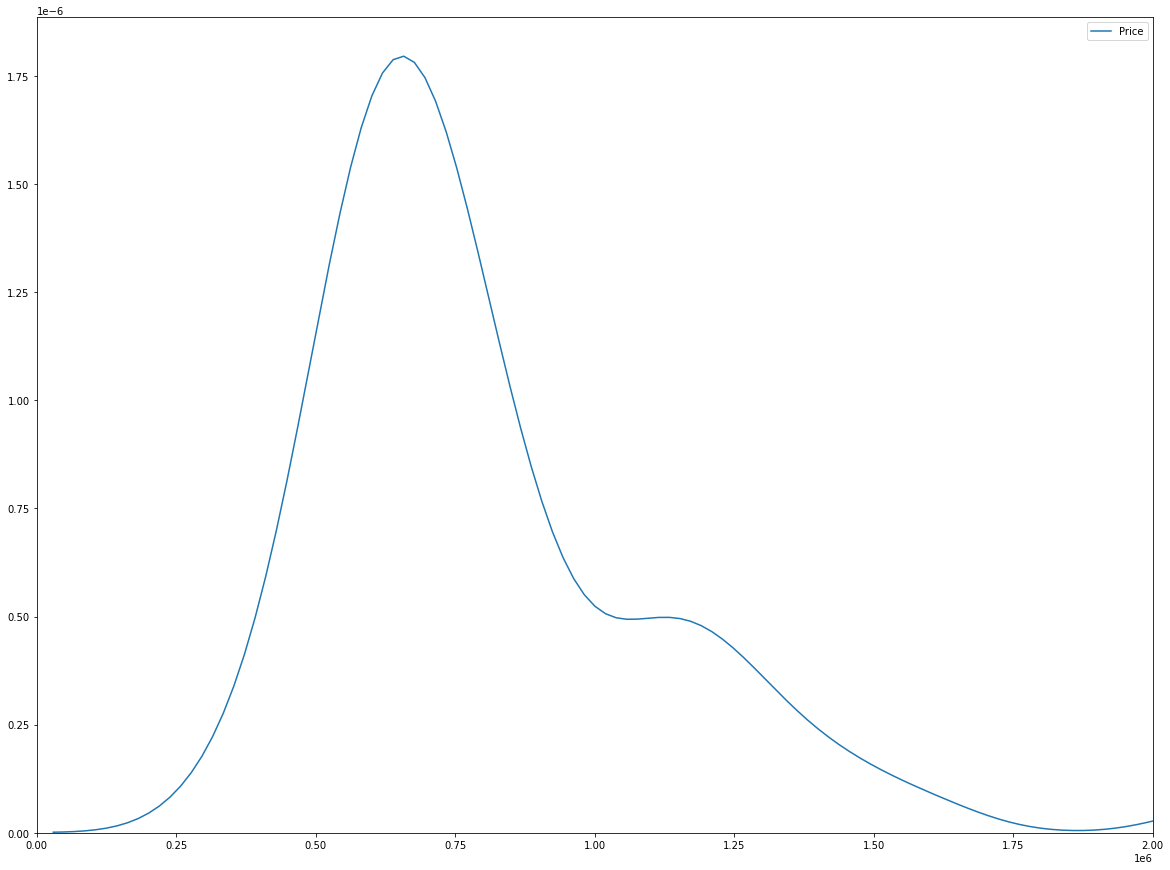

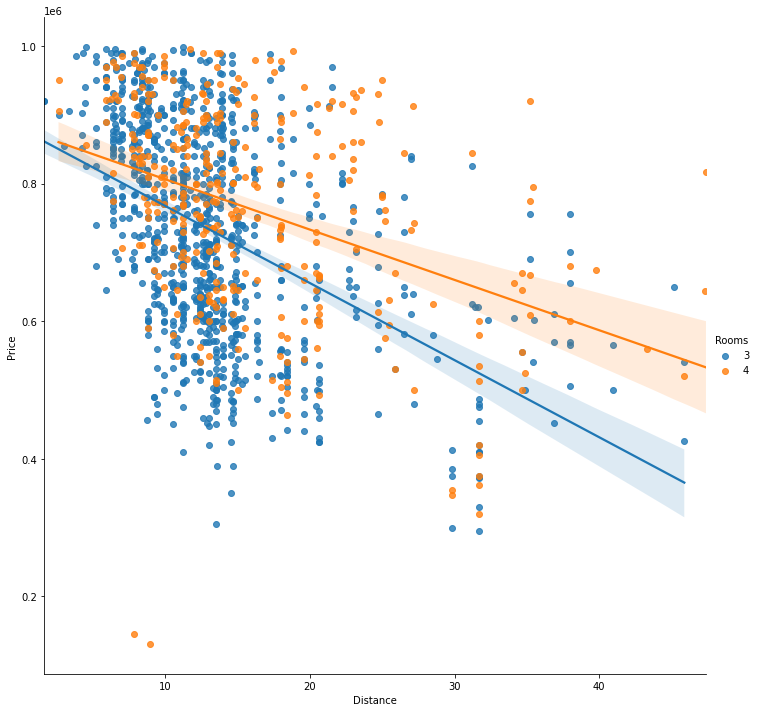

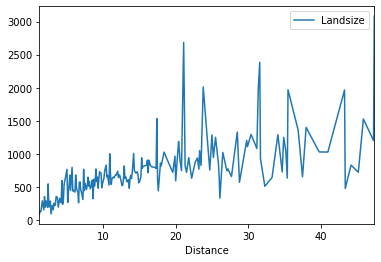

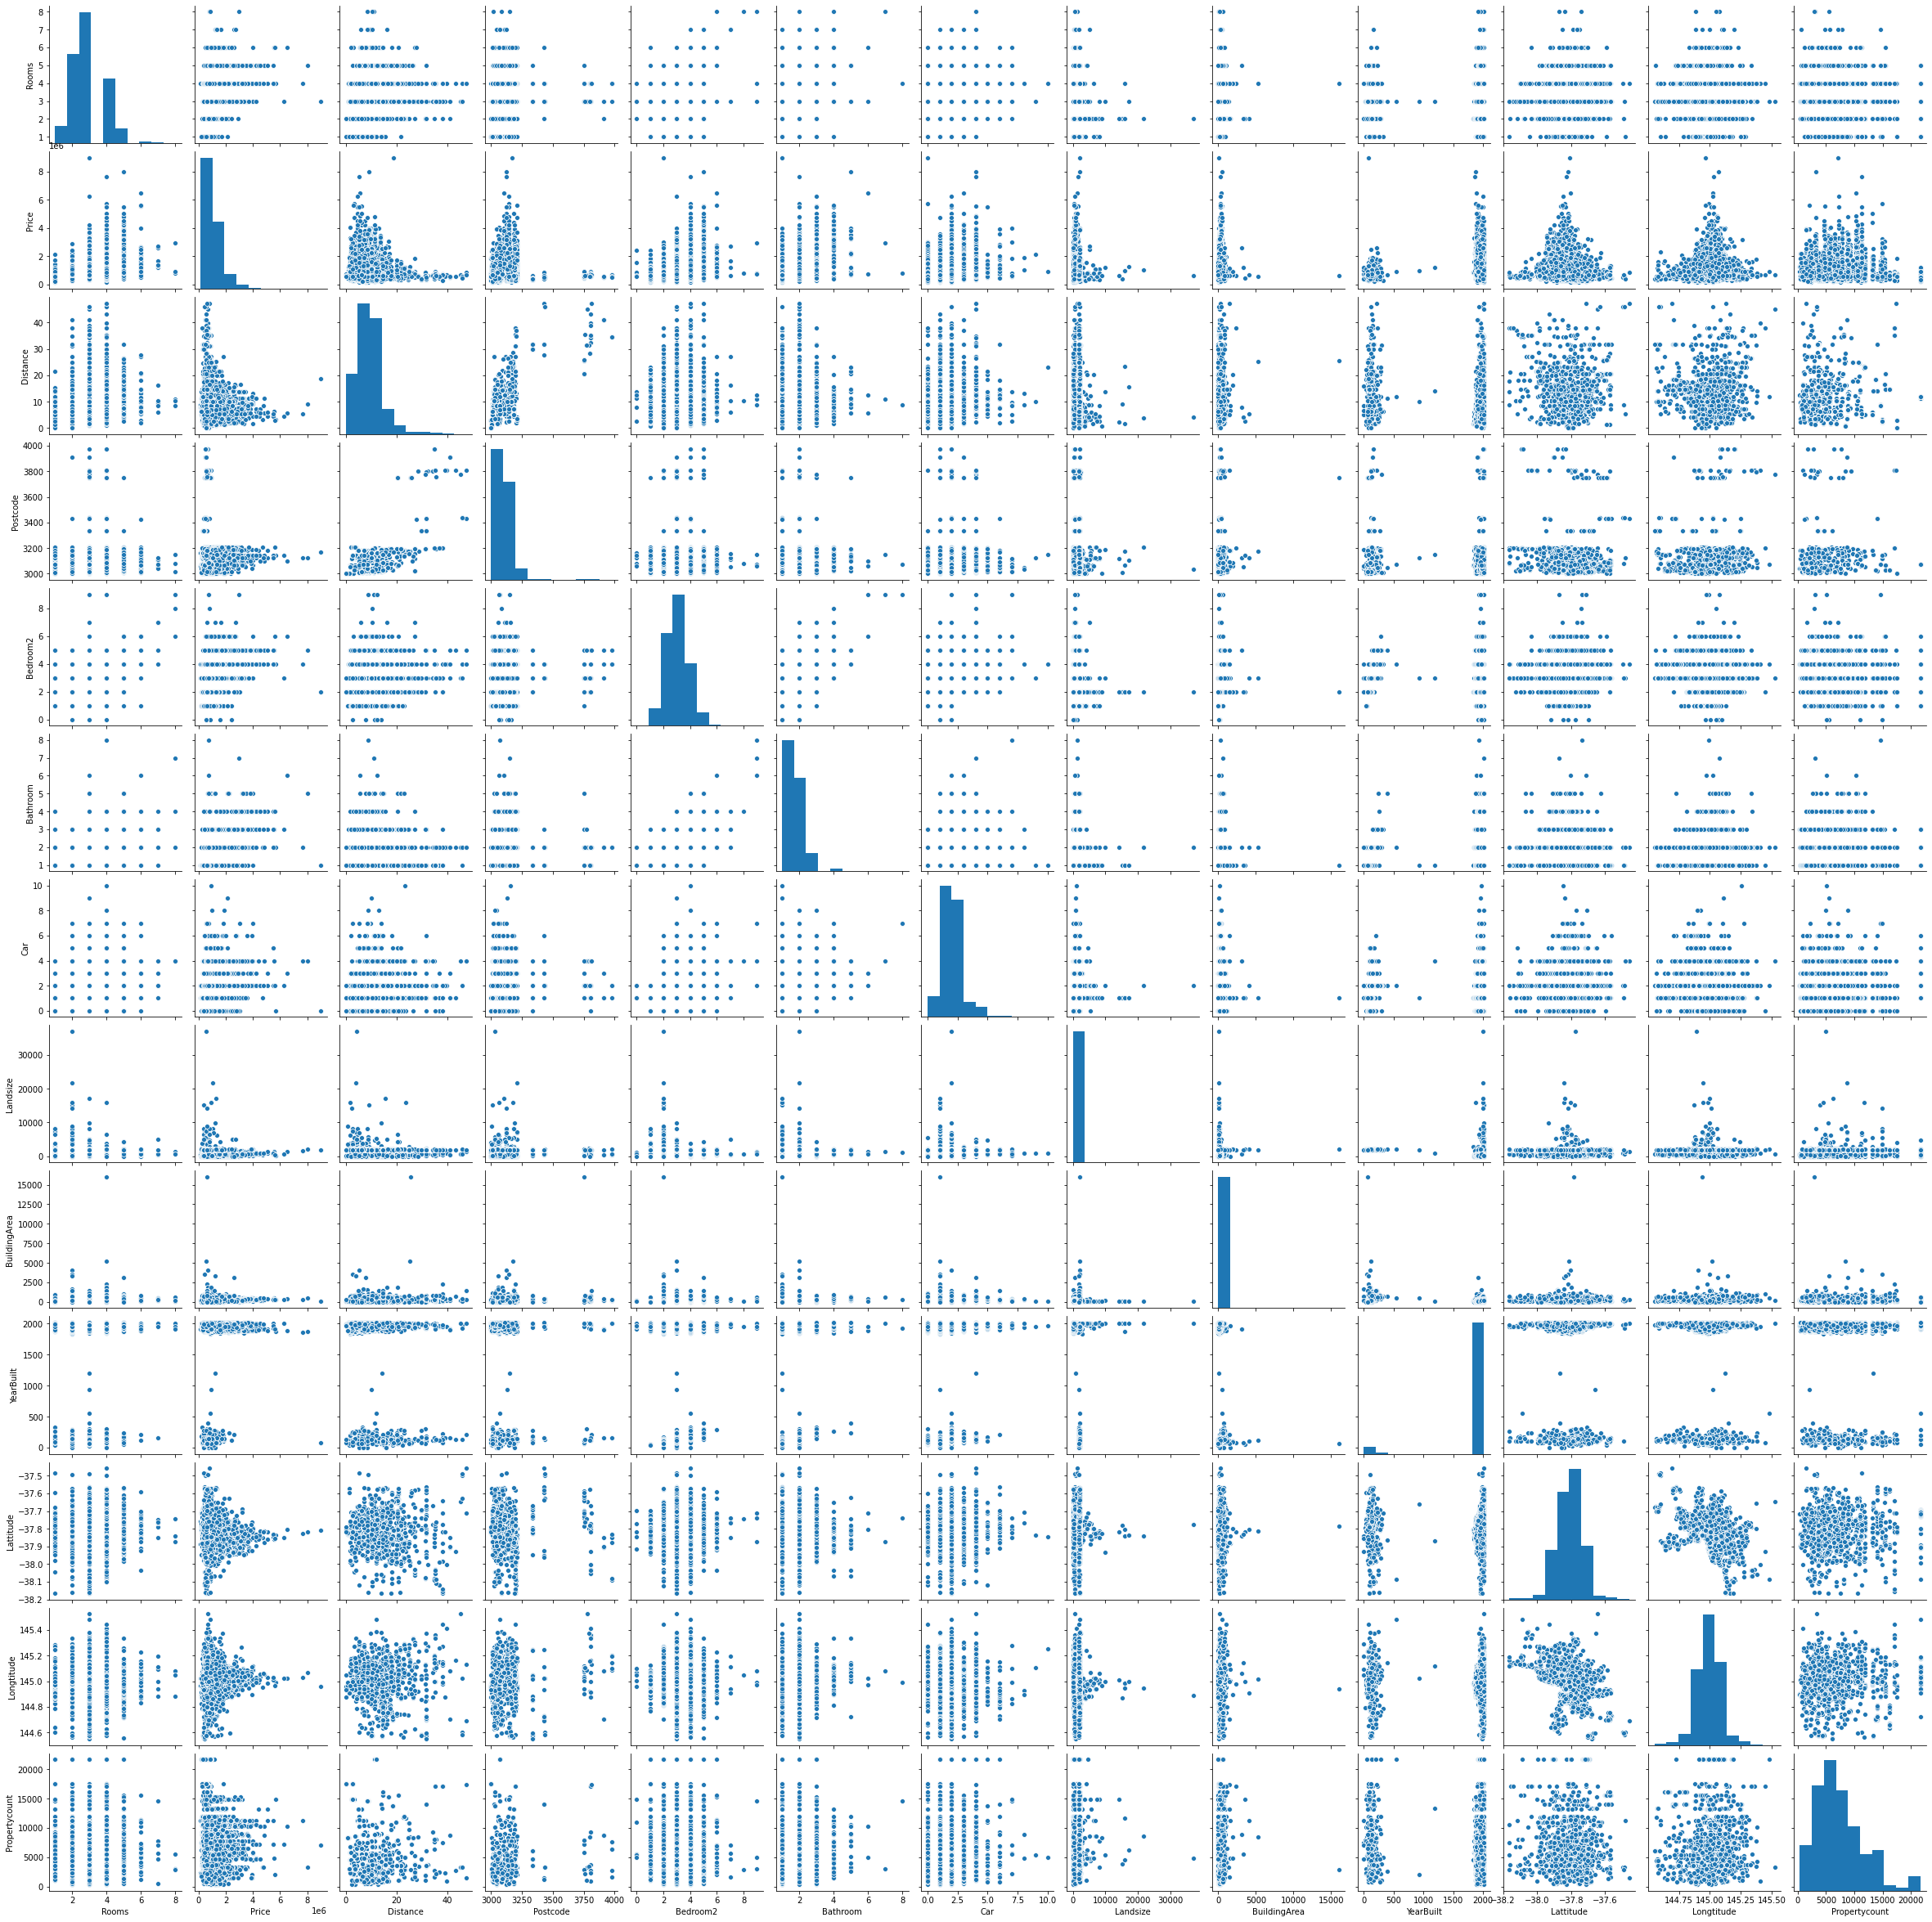

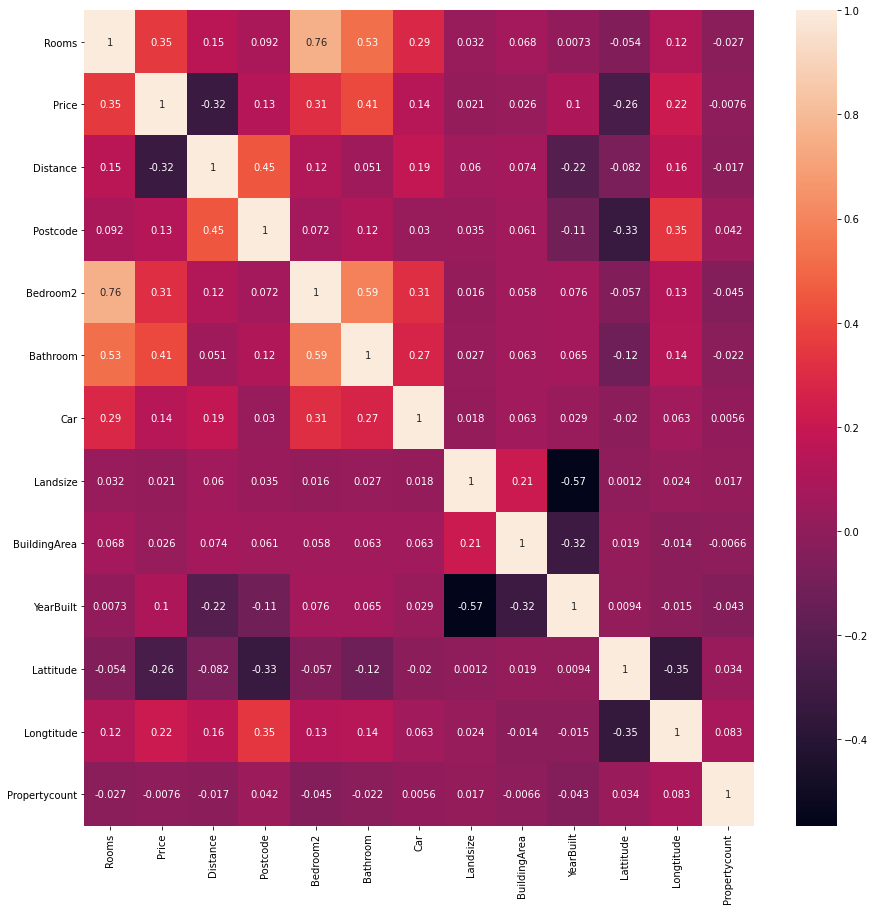

In [10]:

# %% [code] {"_execution_state":"idle"}
plt.figure(figsize=(20,15))
my_axis = sns.kdeplot(dataframe["Price"][((dataframe["Type"]=="u") &
                                (dataframe["Distance"]>8) &
                                (dataframe["Distance"]<10) &
                                (dataframe["Rooms"] > 2)#&
                                #(dataframe["Price"] < 1000000)
                               )])
my_axis.axis(xmin=0, xmax=2000000)


# %% [code]


# %% [code] {"_execution_state":"idle"}
sns.lmplot("Distance","Price",dataframe[(dataframe["Rooms"]<=4) & #plots data and regresiion model against a facet grid
                                         (dataframe["Rooms"]> 2) & #FacetGrid is a multiplotgrip for plotting conditional relationships
                                        (dataframe["Type"]=="h") &
                                        (dataframe["Price"]< 1000000)
                                       ].dropna(),hue="Rooms", size=10)

# %% [code] {"_execution_state":"idle"}
dataframe[(dataframe["Rooms"]>2) & (dataframe["Type"] == "h")& (dataframe["Landsize"] <5000)][["Landsize","Distance"]].dropna().groupby("Distance").mean().plot()

# %% [code] {"_execution_state":"idle"}
dataframe.columns


# %% [code] {"_execution_state":"idle"}
sns.pairplot(dataframe.dropna())

# %% [code] {"_execution_state":"idle"}
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(dataframe[dataframe["Type"] == "h"].corr(), annot=True)

# %% [code] {"_execution_state":"idle"}
from sklearn.model_selection import train_test_split

# %% [code] {"_execution_state":"idle"}
dataframe_dr = dataframe.dropna().sort_values("Date")

In [0]:

# %% [code] {"_execution_state":"idle"}
dataframe_dr = dataframe_dr

# %% [code] {"_execution_state":"idle"}
from datetime import date

# %% [code] {"_execution_state":"idle"}
all_Data = []

# %% [code] {"_execution_state":"idle"}
###########
##Find out days since start
days_since_start = [(x - dataframe_dr["Date"].min()).days for x in dataframe_dr["Date"]]

# %% [code] {"_execution_state":"idle"}
dataframe_dr["Days"] = days_since_start

# %% [code] {"_execution_state":"idle"}
#suburb_dummies = pd.get_dummies(dataframe_dr[["Suburb", "Type", "Method"]])
suburb_dummies = pd.get_dummies(dataframe_dr[["Type", "Method"]]) #categorises data into different parameters
#suburb_dummies = pd.get_dummies(dataframe_dr[[ "Type"]])
#suburb_dummies = pd.get_dummies(dataframe_dr[["Suburb", "Method"]])

# %% [code] {"_execution_state":"idle"}
all_Data = dataframe_dr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)

# %% [code] {"_execution_state":"idle"}


# %% [code] {"_execution_state":"idle"}



# %% [code] {"_execution_state":"idle"}
X = all_Data

# %% [code] {"_execution_state":"idle"}
y = dataframe_dr["Price"]

# %% [code] {"_execution_state":"idle"}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [12]:
from sklearn.linear_model import LinearRegression

# %% [code] {"_execution_state":"idle"}
lm = LinearRegression()

# %% [code] {"_execution_state":"idle"}
lm.fit(X_train,y_train)

# %% [raw]
# ######

# %% [code] {"_execution_state":"idle"}
print(lm.intercept_)

-123716286.11897771


(200000.0, 1000000.0)

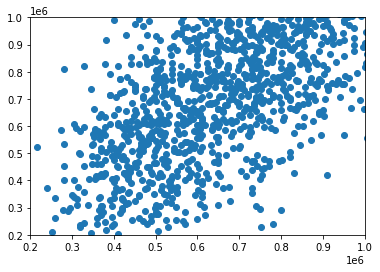

In [13]:
X.columns

# %% [code] {"_execution_state":"idle"}
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

# %% [code] {"_execution_state":"idle"}
predictions = lm.predict(X_test)

# %% [code] {"_execution_state":"idle"}

plt.scatter(y_test, predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])

MAE: 285796.5635780757
MSE: 204151174738.12662
RMSE: 451830.91388054297


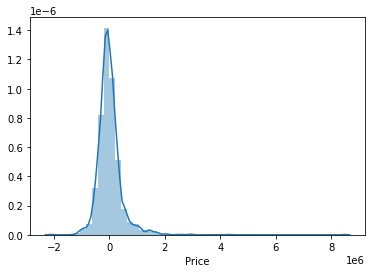

In [14]:
sns.distplot((y_test-predictions),bins=50)

# %% [code] {"_execution_state":"idle"}
from sklearn import metrics

# %% [code] {"_execution_state":"idle"}
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# %% [code] {"_execution_state":"idle"}